In [1]:
!gpu-who

'gpu-who' is not recognized as an internal or external command,
operable program or batch file.


In [2]:
import os
from import_for_notebooks import *
torch.set_default_dtype(torch.float64)

import common_utils
import analysis
import analysis_utils
from analysis import find_nearest_neighbour, scale, sort_by_metric

c:\Users\PREM\AppData\Local\Programs\Python\Python310\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


IMPORTANT IMPORTED! 2023-05-02 12:57:31.830517
device=cuda:0


In [3]:
# in case you have your own sweep:
# sweep_id = 'uvl74ek9'
# sweeps_dir = './data/sweeps/'
# sweep = analysis_utils.read_sweep(sweeps_dir, sweep_id, name=None, problem='mnist_odd_even')
# analysis_utils.download_sweep_results_from_wandb(sweep, max_runs_to_download=100)
# X = analysis_utils.get_all_reconstruction_outputs(sweep, verbose=True)

# read sweep parameters
sweep = common_utils.common.load_dict_to_obj("./reconstructions/mnist_odd_even/sweep.txt")
# read model, data, and whatever needed
args, Xtrn, Ytrn, ds_mean, W, model = analysis_utils.sweep_get_data_model(sweep, put_in_sweep=True, run_train_test=True)

OUTPUT_DIR: C:/Users/PREM/Downloads/dataset_reconstruction-main (1)/dataset_reconstruction-main/runs\2023_05_02_12_57_50_698199_mnist_odd_even_d250
Namespace(cuda=True, seed=1, proj_name='', precision='double', run_mode='reconstruct', pretrained_model_path='C:/Users/PREM/Downloads/dataset_reconstruction-main (1)/dataset_reconstruction-main/runs/2023_04_22_17_39_41_983465_mnist_odd_even_d250_mnist_odd_even/weights-mnist_odd_even_d250_mnist_odd_even.pth', train_save_model=True, train_save_model_every=-1, extract_save_results=True, extract_save_results_every=10000, save_args_files=True, wandb_active=False, wandb_project_name='Dataset_Extraction', wandb_entity='dataset_extraction', problem='mnist_odd_even', data_per_class_train=250, data_per_class_val=0, data_per_class_test=1000, data_reduce_mean=True, model_type='mlp', model_hidden_list=[1000, 1000], model_use_bias=False, use_init_scale=True, use_init_scale_only_first=True, model_init_list=[0.001, 0.001], model_train_activation='relu', tr

In [4]:
x_paths = [r'C:/Users/PREM/Downloads/dataset_reconstruction-main (1)/dataset_reconstruction-main/runs\2023_05_02_12_51_29_509401_mnist_odd_even_d250\x\4000_x.pth']

# X = torch.load(x_paths[0])
# X = torch.load(x_paths[1])
X = torch.cat([torch.load(x_paths[0])])

asdf
12
CUT the end of the zipped bla because it might have different shape before torch.cat
torch.Size([990, 1, 28, 28]) 66


  0%|          | 0/17 [00:00<?, ?it/s]

0 0 60


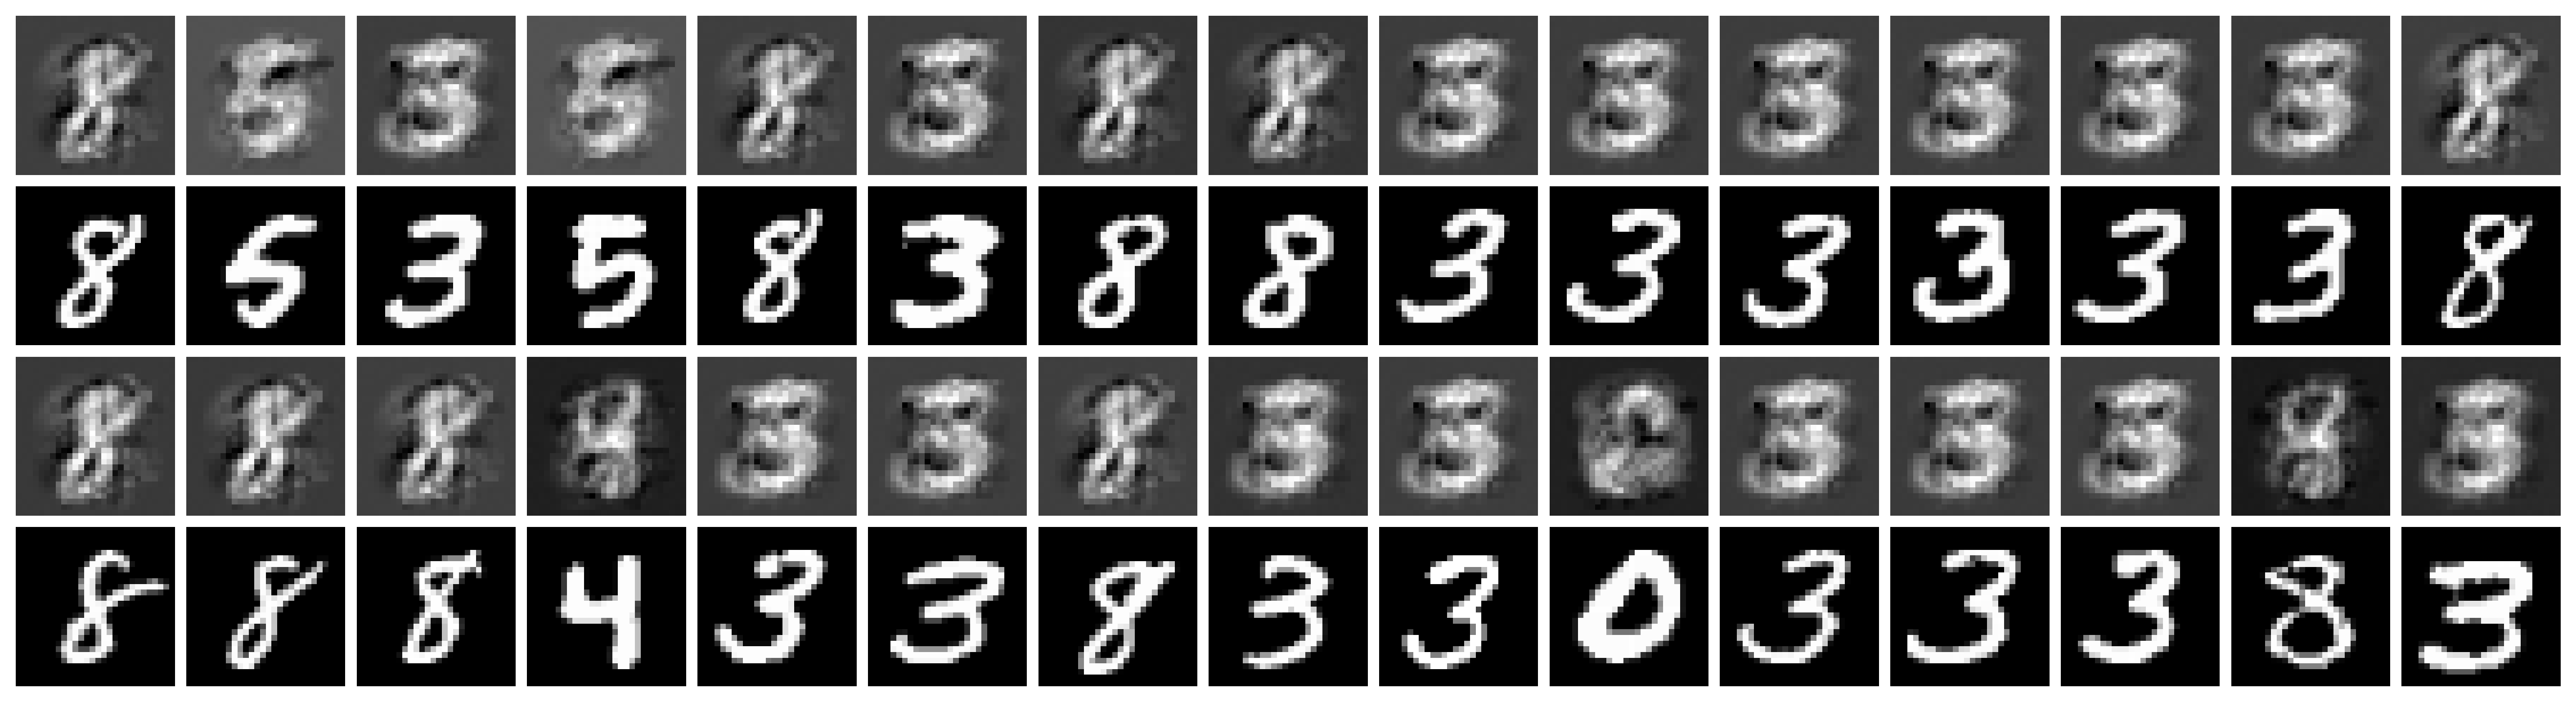

  0%|          | 0/17 [00:03<?, ?it/s]

DONE!


In [5]:
# Find "Good" Resonctructions (as detailed in Appendix B.3):

# Find Nearest Neighbour
xx1 = find_nearest_neighbour(X, Xtrn, search='ncc', vote='min', use_bb=False, nn_threshold=None)
# Scale to Images
print(12)
xx_scaled, yy_scaled = scale(xx1, Xtrn, ds_mean)
# # Sort
xx, yy, ssims, sort_idxs = sort_by_metric(xx_scaled, yy_scaled, sort='ssim')
values = model(Xtrn).data

# Plot
# color_by_labels = Ytrn[sort_idxs]
color_by_labels = None
figpath=None
analysis.plot_table(xx, yy, fig_elms_in_line=15, fig_lines_per_page=4, fig_type='one_above_another', color_by_labels=color_by_labels, figpath=figpath, show=True, dpi=100)

### Show Weights of first Layer

CUT the end of the zipped bla because it might have different shape before torch.cat
torch.Size([990, 1, 28, 28]) 66


  0%|          | 0/17 [00:00<?, ?it/s]

0 0 60


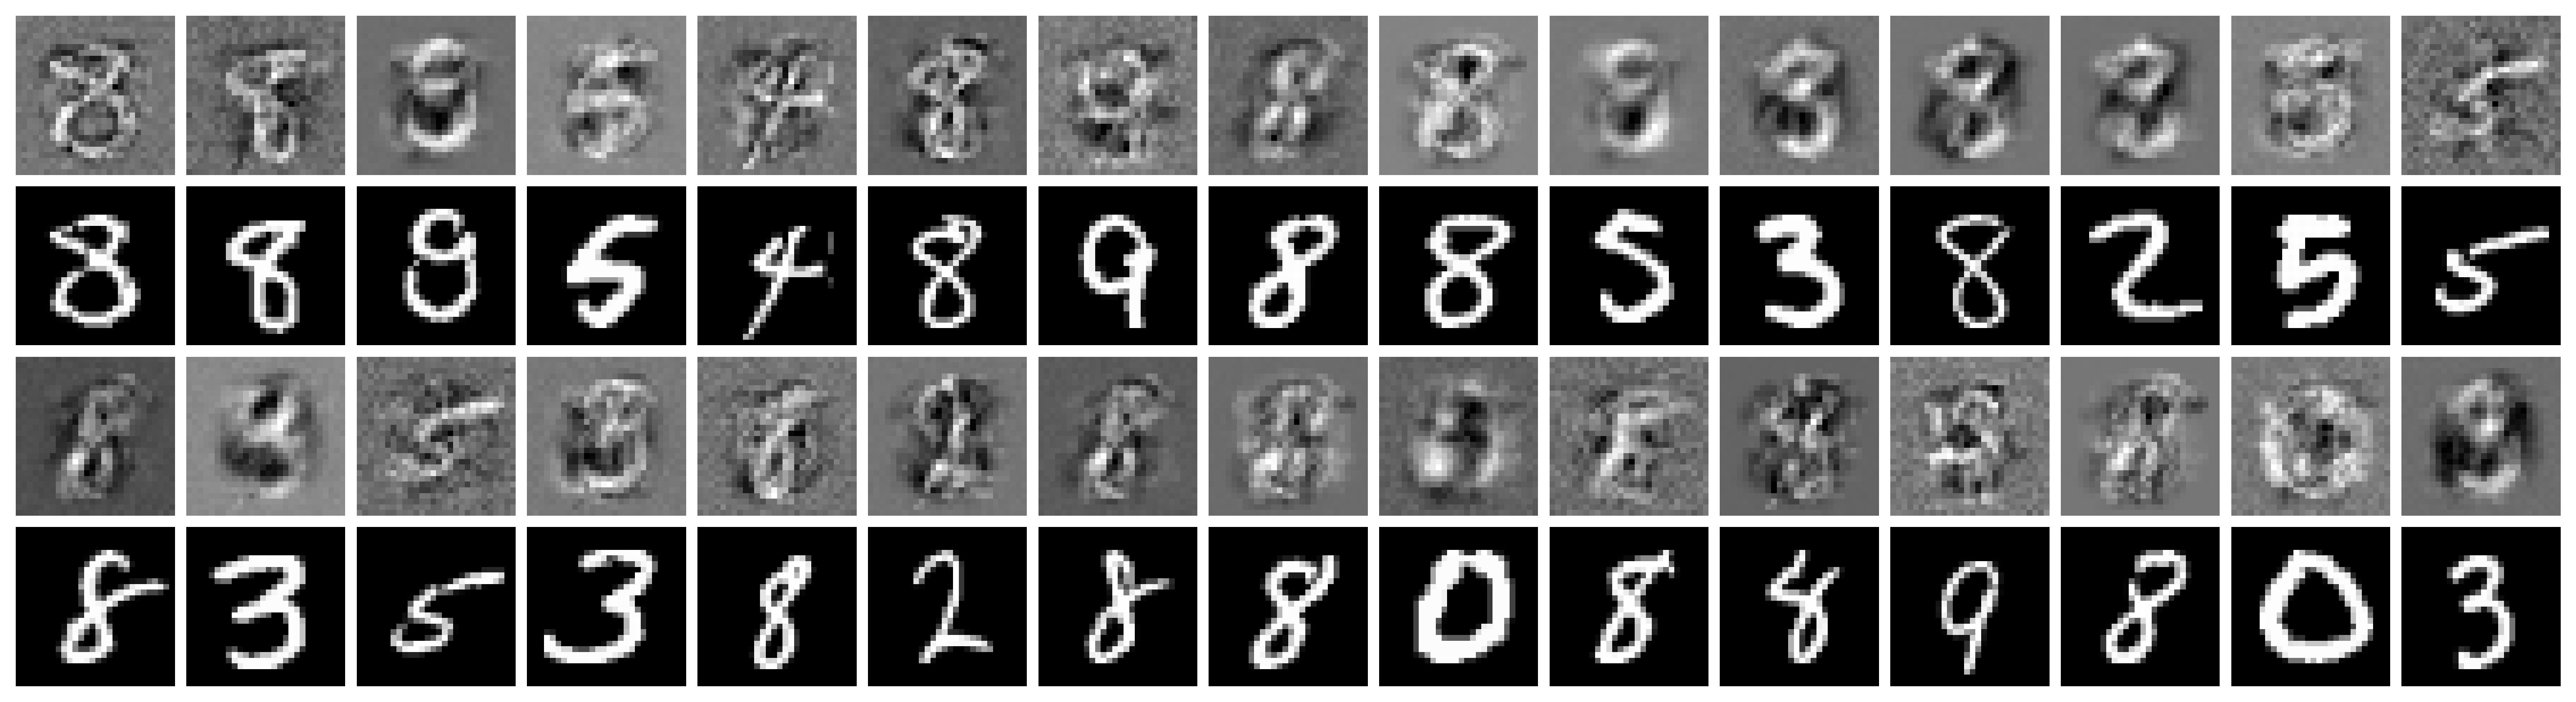

  0%|          | 0/17 [00:01<?, ?it/s]

DONE!


In [21]:
# Show how the weights of the first layer looks like, for comparison.
# Note that some data samples can be found in the first layer, but not as near as many that can be reconstructed using our approach.

X = sweep.W.reshape(sweep.W.shape[0], 1, 28, 28)

# Find Nearest Neighbour
# xx1 = find_nearest_neighbour(X, Xtrn, search='ncc', vote='min', use_bb=False, nn_threshold=None)
xx1 = find_nearest_neighbour(X, Xtrn, search='ncc', vote='mean', use_bb=True, nn_threshold=1.1)
# Scale to Images
xx_scaled, yy_scaled = scale(xx1, Xtrn, ds_mean, xx_add_ds_mean=False)
# Sort
xx, yy, ssims, sort_idxs = sort_by_metric(xx_scaled, yy_scaled, sort='ssim')
# Plot
analysis.plot_table(xx, yy, fig_elms_in_line=15, fig_lines_per_page=4, fig_type='one_above_another', color_by_labels=None, figpath=None, show=True, dpi=100)
